# Numpy & matplotlib

This notebook was written by Tim Hillel (tim.hillel@epfl.ch) for the Decision-aid methodologies in transportation course at EPFL (http://edu.epfl.ch/coursebook/en/decision-aid-methodologies-in-transportation-CIVIL-557). 

Please contact before distributing or reusing the material below.


## Overview 

This notebook will introduce two new Python *libraries*:
* Numpy
* Matplotlib

## Numpy

Data structures (e.g. `lists` and `dictionaries`) are fine for 1-D data, but what if we have data in two or more dimensions?

Many (all?) of you have used Matlab - use arrays!

Python has matlab-like array functionality - *numpy*

Great documentation and tutorials are available for numpy: 

https://docs.scipy.org/doc/numpy/user/quickstart.html

### Importing libraries

Python is geared towards code reuse, and there is a huge number of libraries you can use to add functionality to Python.

Anaconda has the most useful libraries for data science pre-installed, including `numpy`

We can import a library using the `import` keyword, e.g.

    import numpy
    
However, we usually give numpy the alias *np* using the keyword `as`

In [1]:
import numpy as np

### Creating and manipulating arrays

Unlike matlab, we need to specifically call `numpy` functions when we are using arrays in python.

For example, we can create an array using the `np.array()` function with a list of lists

In [2]:
np.array([[1,2,3],[3,2,1]])

array([[1, 2, 3],
       [3, 2, 1]])

Numpy can also easily create arrays of regular format. Use the `arange` function to create a vector with the numbers 0 to 19, and store it as `a1`

In [3]:
# create vector a1
a1 = np.arange(20)
a1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Arrays have lots of methods you can use with them. Use the `reshape` method to turn the array into a 4x5 array, and store it as `a2`. Can you reshape it to 7x3? What happens if you try?

In [4]:
# reshape a1 to 4x5 and store the result in a2
a2 = a1.reshape(4,5)
a2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

With any 2D array, we can reshape it with -1 to get it back to a vector. Try reshaping a2 to a vector (do not store it!)

In [5]:
a1.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### Indexing arrays

Indexing arrays is similar to lists, except now we can specify a row and a column. 
Get the 2nd value in the 3rd row.

In [6]:
a2[2,1]

11

We can also slice arrays. Try extracting (from a2):
* the 2nd row of the array `[5, 6, 7, 8, 9]`
* the 3rd column of the array `[2, 7, 12, 17]`
* the top-right 2x3 sub-array `[[3, 4], [8, 9] [13, 14]]`

*Hint*: remember the `:` can be used to select all values in a row or column

In [7]:
display(a2[1])
display(a2[:,2])
display(a2[:-1,3:])

array([5, 6, 7, 8, 9])

array([ 2,  7, 12, 17])

array([[ 3,  4],
       [ 8,  9],
       [13, 14]])

### Attributes and methods

Arrays have a datatype, which we can check with the `dtype` *attribute*. Note, as it is an attribute, we do not call it!

In [8]:
a2.dtype

dtype('int32')

Try dividing the array by two and storing it as a3, and then checking the dtype

In [9]:
a3 = a2/2
display(a3)
a3.dtype

array([[0. , 0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. , 4.5],
       [5. , 5.5, 6. , 6.5, 7. ],
       [7.5, 8. , 8.5, 9. , 9.5]])

dtype('float64')

Numpy arrays have several attributes and methods. Try checking the a3's `shape`. What about the `max` value? How about the index of the max value?

In [10]:
display(a3.shape)
display(a3.max())
display(a3.argmax())

(4, 5)

9.5

19

### Random numbers

We can also use numpy to generate (pseudo) random numbers, using the `random` submodule. 

When generating random numbers, it is a good idea to set the `seed`, so that we can generate the same numbers when we repeat our experiments.

In [11]:
np.random.seed(42)

Create an array of uniform random floats the same shape as a3, between -2 and 2, using the `rand` method in the random submodule. Call it a4

In [12]:
np.random.seed(42)
# create a4
a4 = 4*(np.random.rand(4,5)-0.5)
a4

array([[-0.50183952,  1.80285723,  0.92797577,  0.39463394, -1.37592544],
       [-1.37602192, -1.76766555,  1.46470458,  0.40446005,  0.83229031],
       [-1.91766202,  1.87963941,  1.32977056, -1.15064356, -1.27270013],
       [-1.26638196, -0.78303103,  0.09902573, -0.27221993, -0.83508344]])

Try calculating the mean and variance (using `sum` and `size`)

Compare the answers you get to using the `mean` and `var` methods

In [13]:
a4_mean = a4.sum()/a4.size
a4_var = (a4**2).sum()/a4.size - a4_mean**2
display(a4_mean)
display(a4.mean())
display(a4_var)
display(a4.var())

-0.16919084640885784

-0.16919084640885784

1.4390023674376569

1.439002367437657

### Boolean arrays and indexing

We can use boolean conditions, e.g. `==` (is equal to) and `=<` (is equal to or greater than) on arrays to create boolean arrays.

Try creating a boolean array of all the values larger than 1 in `a4`

In [14]:
a4>1

array([[False,  True, False, False, False],
       [False, False,  True, False, False],
       [False,  True,  True, False, False],
       [False, False, False, False, False]])

A boolean array can be used a *mask*, which extracts only the elements with a true value, as follows:
    
    <array>[<boolean_mask>]
    
Try extracting all of the values in a4 smaller than -1

In [15]:
a4[a4<-1]

array([-1.37592544, -1.37602192, -1.76766555, -1.91766202, -1.15064356,
       -1.27270013, -1.26638196])

## Plotting

As with `numpy`, python borrows its primary plotting interface from matlab.

The main library for plotting in python is `matplotlib`. Matplotlib has mulitple interfaces, the most commonly used is the `pyplot` interface. We normally give it the alias `plt`

In [16]:
import matplotlib.pyplot as plt

We can generate a plot with `plt.plot()`. Try plotting the array `a4` and see what happens. Can you explain the plot?

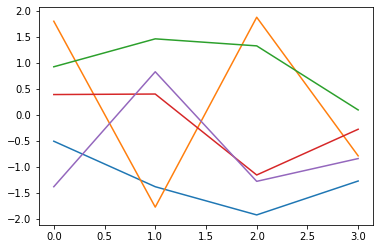

In [17]:
plt.plot(a4)

Try adding a3 and a4 and plotting all of the data as a single line. Remember we can *reshape* a 2D array into a vector

In [18]:
plt.plot((a3+a4).reshape(-1))

## Exercise

You will need to use the matplotlib documentation to achieve this! Feel free to work together and ask for help!

You are going to try and recreate the following plot:

<img src="data/example.jpg">

* Use the numpy random module to generate a 2x500 array of normally distributed numbers with mean 10 and standard deviation 20. Use the random seed 404 to generate the random points
* Plot the data as a 2D scatter plot (so that each column represents one data point x, y, z). Use orange crosses for the data points. Add the label 'data' to the points
* Add the mean to the plot as a large blue dot. Add the label 'mean' to the plot.
* Label the axis 'x' and 'y'.
* Add a legend
* Save the plot as normal_scatter.jpeg

In [19]:
np.random.seed(404)
points = 20*np.random.standard_normal((2,500))+10
plt.scatter(points[0],points[1], marker='x', color='orange', label='data')
plt.scatter(points[0].mean(), points[1].mean(), color='blue', marker='o', s=100, label='mean')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('normal_scatter.jpg')